In [1]:
!pip install ultralytics > /dev/null

## 𝙞𝙢𝙥𝙤𝙧𝙩 𝙡𝙞𝙗𝙨

In [2]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## 𝙘𝙧𝙚𝙖𝙩𝙚 𝙮𝙖𝙢𝙡 𝙘𝙤𝙣𝙛𝙞𝙜𝙪𝙧𝙖𝙩𝙞𝙤𝙣

In [3]:
data_yaml = """
train: /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/images
val: /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/images

nc: 2
names: ['cheerios', 'soup']
"""

with open('/kaggle/working/data.yaml', 'w') as file:
    file.write(data_yaml)

## 𝙇𝙚𝙖𝙧𝙣 𝙔𝙊𝙇𝙊𝙫12 𝙢𝙤𝙙𝙚𝙡

In [4]:
model = YOLO("yolo12m.pt")
data_yaml = '/kaggle/working/data.yaml'

results = model.train(
    data=data_yaml,
    pretrained=True,
    epochs=150,
    batch=8,
    imgsz=960,
    device=[0, 1],
    patience=20,
    lr0=0.0001,
    lrf=0.02,
    optimizer="Adam",
    weight_decay=0.0004,
    cos_lr=True,
    dropout=0.3,
    label_smoothing=0.01,
    mosaic=0.5,
    mixup=0.15,
    copy_paste=0.1,
    fliplr=0.5,
    flipud=0.4,
    hsv_h=0.02,
    hsv_s=0.2,
    hsv_v=0.4,
    translate=0.2,
    scale=0.5,
    shear=0.2,
    perspective=0.007,
    val=True,
    workers=8,
    seed=6
)

100%|██████████| 39.0M/39.0M [00:00<00:00, 220MB/s]


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.3, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.4, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.2, hsv_v=0.4, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.02, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=yolo12m.pt, momentum=0.937, mosaic=0.5, multi_scale=Fal

100%|██████████| 755k/755k [00:00<00:00, 17.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2689536  ultralytics.nn.modules.block.A2C2f           [512, 512, 2, True, 4]        
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 64.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 41.5±7.6 MB/s, size: 4800.4 KB)


train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:18<00:00, 54.27it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels...:   0%|          | 0/95 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 99.2±29.7 MB/s, size: 16361.9 KB)


train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:04<00:00, 205.92it/s]
val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:04<00:00, 20.90it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 123 weight(decay=0.0), 130 weight(decay=0.0004), 129 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      9.11G      1.936      2.914      2.026         10        960: 100%|██████████| 125/125 [01:25<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.48s/it]


                   all         95        172      0.636      0.631      0.668      0.414


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      9.33G      1.792      1.956      1.876         14        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]


                   all         95        172      0.719      0.692      0.707      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      9.32G      1.796      1.818      1.882          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.778      0.655      0.725      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      9.33G      1.672      1.783      1.811          7        960: 100%|██████████| 125/125 [01:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.708      0.593      0.657      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      9.32G      1.757      1.717       1.86          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172      0.645      0.521      0.621      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      9.36G      1.713      1.656       1.82          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.717      0.588      0.702      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      9.33G      1.698      1.668      1.824          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]


                   all         95        172      0.723      0.774      0.767      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      9.33G      1.643       1.64       1.79         11        960: 100%|██████████| 125/125 [01:22<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]


                   all         95        172      0.743      0.709      0.756      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      9.36G       1.67      1.736      1.826         14        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.35s/it]


                   all         95        172      0.777      0.752      0.792      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      9.35G       1.67      1.676      1.857          7        960: 100%|██████████| 125/125 [01:22<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.35s/it]


                   all         95        172      0.771      0.635      0.729       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      9.35G       1.66      1.569      1.788         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.22s/it]


                   all         95        172        0.8      0.643      0.734      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      9.35G      1.636      1.504      1.708          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.19s/it]


                   all         95        172      0.789      0.687      0.769      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       9.3G      1.628      1.563      1.762         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.25s/it]


                   all         95        172      0.759      0.752      0.776      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      9.36G      1.641      1.538        1.7         13        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.23s/it]


                   all         95        172        0.8      0.723      0.783      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      9.35G      1.549      1.547      1.688          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.34s/it]


                   all         95        172      0.791      0.614      0.711      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      9.36G      1.654      1.552      1.761          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.28s/it]


                   all         95        172      0.746      0.632      0.724      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      9.34G      1.534      1.509      1.653          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


                   all         95        172      0.831       0.75      0.832       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      9.34G      1.567      1.483      1.705          4        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.34s/it]


                   all         95        172      0.847      0.645      0.751      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      9.33G      1.577      1.474      1.717          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172      0.757       0.68       0.77      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      9.37G      1.516      1.436      1.649          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.826      0.678      0.773      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      9.33G      1.501      1.444      1.627          4        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]


                   all         95        172      0.795      0.777      0.824       0.53


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      9.35G      1.504      1.403      1.666          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.819      0.738      0.808      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      9.35G      1.478      1.395      1.594          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172      0.659      0.742      0.764      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      9.36G      1.554      1.442      1.724          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.812      0.685      0.777      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      9.33G      1.517      1.463      1.686          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.37s/it]


                   all         95        172      0.713      0.614       0.64      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      9.35G      1.523      1.449      1.647          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.37s/it]


                   all         95        172      0.702      0.754      0.711      0.462


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      9.35G      1.483      1.447      1.635          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.22s/it]


                   all         95        172      0.714      0.775      0.794      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      9.36G      1.477       1.34      1.623          8        960: 100%|██████████| 125/125 [01:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


                   all         95        172      0.781       0.76      0.797      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150       9.3G      1.498      1.526      1.649          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.22s/it]


                   all         95        172      0.809      0.768      0.821      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      9.35G      1.511       1.34      1.653          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.27s/it]


                   all         95        172      0.749      0.708       0.76      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      9.34G      1.466      1.309      1.582          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.25s/it]


                   all         95        172       0.86      0.707      0.793      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      9.33G      1.445      1.379      1.591         14        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.31s/it]


                   all         95        172      0.822       0.66      0.775      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      9.33G      1.505      1.397       1.67          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]


                   all         95        172      0.897      0.738      0.835      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      9.37G      1.455      1.357      1.639          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]


                   all         95        172      0.755       0.71      0.774      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      9.36G      1.438      1.373      1.612          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]


                   all         95        172        0.8      0.746      0.801      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      9.36G      1.405       1.36      1.619          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.757      0.729      0.778      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      9.31G      1.456      1.381      1.614          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]


                   all         95        172      0.864      0.667       0.78      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      9.36G      1.443      1.372      1.598         11        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.824      0.709      0.767      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      9.35G      1.453      1.423        1.6          3        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172       0.85       0.75      0.821      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      9.35G      1.403      1.319      1.563         11        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.44s/it]


                   all         95        172      0.883      0.761      0.827      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      9.35G       1.38      1.266      1.555          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.847      0.736      0.817       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      9.35G      1.403      1.368      1.597          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.755      0.666      0.741      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      9.35G      1.443      1.292      1.607          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


                   all         95        172      0.812      0.761      0.818      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      9.37G      1.399      1.319      1.613          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.20s/it]


                   all         95        172      0.824      0.726      0.785      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      9.31G      1.392       1.29      1.529          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.24s/it]


                   all         95        172      0.879      0.726      0.805      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      9.35G      1.406      1.351      1.573          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.23s/it]


                   all         95        172      0.819      0.718      0.815      0.565


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      9.35G      1.391      1.274      1.564          6        960: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:18<00:00,  1.52s/it]


                   all         95        172      0.797      0.748       0.79      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      9.35G      1.387      1.291      1.582          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.32s/it]


                   all         95        172      0.867      0.711      0.828       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      9.33G       1.35      1.162      1.528          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.34s/it]


                   all         95        172      0.859      0.808      0.848      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      9.37G      1.435      1.258      1.567          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]


                   all         95        172      0.832      0.793      0.853      0.572


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      9.36G      1.377      1.242      1.509          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.37s/it]


                   all         95        172      0.851      0.788      0.846      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      9.35G      1.368      1.418      1.549          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.858      0.775      0.841      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      9.31G      1.347      1.259       1.57         12        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172      0.811      0.757      0.817      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      9.36G      1.341      1.257      1.508         10        960: 100%|██████████| 125/125 [01:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.879      0.737       0.82      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      9.37G      1.363      1.243       1.54         13        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.892      0.754      0.834      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      9.35G      1.348      1.214      1.516          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]


                   all         95        172      0.821      0.748      0.782      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      9.35G      1.281      1.201      1.489         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.37s/it]


                   all         95        172      0.861      0.759      0.818      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      9.35G      1.352      1.216      1.538          4        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172      0.865      0.739      0.827       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      9.33G      1.302      1.223      1.489         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]


                   all         95        172      0.903      0.738       0.85      0.624


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      9.37G      1.401      1.257      1.534          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.34s/it]


                   all         95        172      0.853      0.757       0.85      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      9.31G      1.309      1.229      1.512          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172       0.88      0.774      0.854      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      9.37G      1.321      1.191      1.528          7        960: 100%|██████████| 125/125 [01:22<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172      0.904      0.757      0.861      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      9.35G      1.355      1.205      1.522          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172      0.891      0.732      0.859       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      9.36G      1.339      1.156      1.452          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.26s/it]


                   all         95        172      0.766      0.717      0.789      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      9.35G      1.293      1.198      1.477         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.23s/it]


                   all         95        172      0.847        0.7      0.814        0.6


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      9.33G      1.324      1.223      1.523          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.28s/it]


                   all         95        172      0.803      0.672      0.788      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      9.36G      1.268      1.193      1.462          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172       0.85      0.739      0.847       0.66


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      9.35G      1.297      1.205       1.47          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172      0.836      0.754      0.846      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      9.33G      1.339      1.252      1.517          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.895      0.663      0.812      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      9.36G      1.296      1.181       1.49          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.27s/it]


                   all         95        172      0.856      0.755      0.844      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      9.36G      1.311      1.141      1.489          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.26s/it]


                   all         95        172      0.864      0.795      0.863      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      9.35G       1.34      1.174      1.509         12        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.27s/it]


                   all         95        172      0.872      0.775      0.847      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      9.37G       1.32       1.16      1.504         10        960: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.32s/it]


                   all         95        172      0.867      0.772      0.864      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      9.35G      1.287      1.194      1.496          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.34s/it]


                   all         95        172      0.854      0.742      0.832      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      9.37G      1.227      1.089      1.429         13        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.22s/it]


                   all         95        172      0.852      0.835      0.873      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      9.37G      1.248      1.083       1.46         11        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


                   all         95        172      0.896      0.804      0.883      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      9.33G      1.244       1.13      1.435          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.25s/it]


                   all         95        172      0.834      0.838      0.881      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      9.35G      1.267      1.169      1.463          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.28s/it]


                   all         95        172      0.915      0.782      0.885      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      9.35G      1.256      1.123      1.456         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.914      0.772      0.892      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      9.35G      1.298      1.214      1.468          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.878      0.745      0.847      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      9.35G      1.242      1.124      1.393         12        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.862      0.796      0.863      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      9.36G      1.234       1.05      1.419         15        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.37s/it]


                   all         95        172      0.835      0.801      0.869      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      9.36G      1.309      1.222      1.494          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.891        0.8      0.864      0.634


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      9.35G       1.25      1.159      1.437          4        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]


                   all         95        172      0.863      0.806      0.874      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      9.31G      1.255      1.158      1.422         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.32s/it]


                   all         95        172      0.869      0.756      0.837      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      9.37G      1.222      1.144       1.42         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.24s/it]


                   all         95        172      0.909      0.771      0.853      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      9.35G      1.257      1.145      1.404         11        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.26s/it]


                   all         95        172      0.884      0.706      0.826      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      9.33G      1.238      1.168      1.441          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.26s/it]


                   all         95        172      0.873      0.811      0.882      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      9.35G      1.246      1.106       1.43         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.35s/it]


                   all         95        172      0.897      0.748      0.877      0.682


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      9.33G      1.219      1.124      1.415          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.34s/it]


                   all         95        172      0.902      0.834      0.895      0.666


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      9.33G      1.237      1.103      1.413          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.20s/it]


                   all         95        172      0.858      0.806      0.869      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      9.33G       1.22      1.095      1.408         12        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.23s/it]


                   all         95        172      0.908      0.789       0.88      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      9.33G      1.226      1.044      1.413          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.24s/it]


                   all         95        172      0.887      0.812      0.885      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      9.35G      1.218      1.129      1.457          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.27s/it]


                   all         95        172      0.897      0.801      0.871      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      9.33G      1.209      1.089      1.373          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.25s/it]


                   all         95        172       0.88      0.804      0.857      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      9.37G      1.186      1.068       1.38          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.32s/it]


                   all         95        172      0.869      0.803      0.863      0.663


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      9.36G       1.19      1.094      1.419          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.43s/it]


                   all         95        172      0.874      0.785      0.875      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      9.35G      1.225      1.095      1.425         12        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.885       0.76      0.871      0.649


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      9.37G      1.175      1.041       1.41          6        960: 100%|██████████| 125/125 [01:22<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.944      0.715      0.848      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      9.35G      1.158      1.077      1.381          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.901      0.752      0.847      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      9.32G      1.162     0.9832      1.324          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.35s/it]


                   all         95        172      0.844      0.778      0.864      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      9.33G      1.202       1.03      1.389          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172       0.89      0.738      0.854      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      9.35G      1.196      1.055      1.428          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.841      0.758      0.857      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      9.35G      1.164      1.017      1.388         11        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172       0.88      0.739      0.869       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      9.35G      1.196     0.9895       1.39          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.44s/it]


                   all         95        172      0.868      0.721       0.86      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      9.35G      1.186      1.095       1.44          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.911      0.748      0.868       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      9.35G      1.171      1.029      1.383          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


                   all         95        172      0.923      0.744      0.881      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      9.33G      1.207      1.046      1.393         10        960: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.20s/it]


                   all         95        172      0.896      0.784      0.875       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      9.33G      1.155       1.07      1.381          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


                   all         95        172      0.879      0.818       0.89      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      9.37G      1.164      1.036      1.404          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.32s/it]


                   all         95        172      0.839      0.784       0.86      0.681


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      9.36G      1.181      1.051      1.391          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]


                   all         95        172      0.883      0.748      0.872      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      9.36G      1.172      1.037      1.406          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.843       0.83      0.882      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      9.35G      1.219      1.061      1.432          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.44s/it]


                   all         95        172      0.861      0.827      0.878      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      9.33G       1.21      1.088      1.434         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.42s/it]


                   all         95        172      0.885      0.778      0.874      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      9.35G      1.211      1.033      1.416         13        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.881      0.785      0.882      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      9.35G      1.153      1.031      1.366          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.37s/it]


                   all         95        172      0.904      0.771      0.883      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      9.33G      1.136      1.023      1.372         10        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]


                   all         95        172      0.863      0.829      0.892      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      9.36G       1.18      1.022      1.398         14        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.34s/it]


                   all         95        172      0.853      0.836      0.889      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      9.36G      1.149      1.029      1.406          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.912      0.759      0.884      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      9.33G      1.125      0.965      1.342          8        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.43s/it]


                   all         95        172      0.932      0.758      0.881      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      9.36G      1.157      1.001      1.409         13        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.43s/it]


                   all         95        172      0.933      0.754      0.882      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      9.35G      1.108     0.9906      1.348          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]


                   all         95        172      0.934      0.749      0.883      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      9.35G      1.117      1.011      1.323         11        960: 100%|██████████| 125/125 [01:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.24s/it]


                   all         95        172      0.821      0.861      0.891      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      9.35G      1.144      1.045      1.369          5        960: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


                   all         95        172      0.889      0.801      0.894       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      9.33G      1.118     0.9998      1.344          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.23s/it]


                   all         95        172      0.832      0.857       0.89       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      9.35G      1.105      0.974      1.347          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


                   all         95        172      0.858      0.822      0.887      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      9.33G      1.106     0.9896      1.347         12        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.29s/it]


                   all         95        172       0.87      0.796      0.888      0.727


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      9.37G      1.099     0.9832       1.35          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.861      0.785      0.874      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      9.33G      1.128     0.9477      1.356          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.884      0.786      0.883      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      9.35G       1.13      0.944      1.345          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]


                   all         95        172      0.867       0.79      0.877      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      9.36G      1.106     0.9665      1.351          7        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.37s/it]


                   all         95        172       0.87      0.776      0.873      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      9.35G      1.143      1.035      1.346          6        960: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.37s/it]


                   all         95        172      0.884      0.784      0.879      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      9.33G      1.116     0.9601      1.354          5        960: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.35s/it]


                   all         95        172      0.865      0.784      0.875      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      9.35G      1.126     0.9549      1.324         10        960: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172      0.883      0.787      0.882      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      9.35G      1.091     0.9767      1.334          8        960: 100%|██████████| 125/125 [01:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.42s/it]


                   all         95        172      0.871      0.802      0.883      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      9.36G      1.121     0.9992      1.366          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.47s/it]


                   all         95        172      0.837      0.809      0.879      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      9.35G      1.131      1.032       1.38          5        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


                   all         95        172      0.823      0.831      0.881      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      9.37G       1.09      0.946      1.337         11        960: 100%|██████████| 125/125 [01:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]


                   all         95        172      0.847       0.85      0.889      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      9.37G      1.105     0.9786      1.351          6        960: 100%|██████████| 125/125 [01:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.23s/it]


                   all         95        172      0.815      0.844      0.887      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      9.35G      1.121     0.9773      1.326          9        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.24s/it]


                   all         95        172      0.801      0.851      0.885      0.735
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      9.33G      0.935     0.7872      1.291          4        960: 100%|██████████| 125/125 [01:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.27s/it]


                   all         95        172      0.813      0.851      0.886      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      9.33G     0.8813     0.7495      1.276          4        960: 100%|██████████| 125/125 [01:22<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.806      0.848       0.88      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      9.35G     0.9269     0.7569      1.279          3        960: 100%|██████████| 125/125 [01:22<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:17<00:00,  1.46s/it]


                   all         95        172      0.795      0.841      0.877      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      9.34G     0.9118     0.7498      1.284          3        960: 100%|██████████| 125/125 [01:22<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.28s/it]


                   all         95        172      0.811       0.83      0.877      0.733


  0%|          | 0/125 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      9.33G     0.8871      0.725      1.254          5        960: 100%|██████████| 125/125 [01:22<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.26s/it]


                   all         95        172       0.85       0.79      0.877      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      9.34G      0.891     0.7578        1.3          4        960: 100%|██████████| 125/125 [01:22<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.27s/it]


                   all         95        172      0.859      0.791      0.878      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      9.32G     0.8555      0.693      1.239          4        960: 100%|██████████| 125/125 [01:22<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]


                   all         95        172      0.845      0.797      0.877      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      9.33G     0.8794     0.7061      1.243          5        960: 100%|██████████| 125/125 [01:22<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]


                   all         95        172      0.809      0.833      0.878      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      9.31G     0.9084     0.7496       1.28          6        960: 100%|██████████| 125/125 [01:22<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]


                   all         95        172      0.829      0.831      0.881      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      9.35G     0.8679     0.6944      1.241          6        960: 100%|██████████| 125/125 [01:22<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.25s/it]


                   all         95        172      0.849      0.818      0.887       0.74

150 epochs completed in 4.207 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
YOLOv12m summary (fused): 169 layers, 20,106,454 parameters, 0 gradients, 67.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:15<00:00,  1.26s/it]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.808      0.848       0.88      0.741
              cheerios         88         88      0.755      0.886       0.89      0.737
                  soup         84         84       0.86       0.81       0.87      0.745
Speed: 0.4ms preprocess, 32.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


## 𝙎𝙝𝙤𝙬 𝙞𝙢𝙖𝙜𝙚

In [5]:
img_path = '/kaggle/input/multi-class-object-detection-challenge/testImages/images/IMG_8656.png'
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
results = model(img_path)


image 1/1 /kaggle/input/multi-class-object-detection-challenge/testImages/images/IMG_8656.png: 960x736 1 cheerios, 1 soup, 80.5ms
Speed: 10.2ms preprocess, 80.5ms inference, 189.5ms postprocess per image at shape (1, 3, 960, 736)


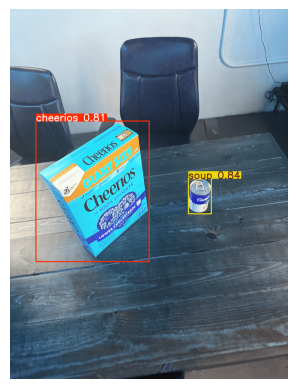

In [6]:
result_img = results[0].plot()
plt.imshow(result_img)
plt.axis('off')
plt.show()

## 𝙋𝙧𝙚𝙙𝙞𝙘𝙩

In [7]:
test_images_dir = '/kaggle/input/multi-class-object-detection-challenge/testImages/images'
image_files = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.png'))]

results_list = []

for img_name in image_files:
    img_path = os.path.join(test_images_dir, img_name)

    with Image.open(img_path) as img:
        width, height = img.size

    results = model.predict(img_path, conf=0.0001, device='0', verbose=False)
    boxes = results[0].boxes
    
    if boxes is not None and len(boxes) > 0:
        prediction_strings = []
        for box in boxes:
            box_data = box.xywh[0].cpu().numpy()
            
            cls = int(box.cls.item())
            conf = box.conf.item()

            x_center = box_data[0] / width
            y_center = box_data[1] / height
            w = box_data[2] / width
            h = box_data[3] / height
            
            prediction_strings.append(f"{cls} {conf:.6f} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}")
        
        prediction_str = " ".join(prediction_strings)
    else:
        prediction_str = "no boxes"
    
    results_list.append({
        "image_id": os.path.splitext(img_name)[0],
        "prediction_string": prediction_str
    })

## 𝙨𝙖𝙫𝙚 𝙨𝙪𝙗𝙢𝙞𝙨𝙨𝙞𝙤𝙣

In [8]:
submission = pd.DataFrame(results_list)
submission.to_csv('submission.csv', index=False)
submission.sample(15)

,image_id,prediction_string
13,IMG_9901,1 0.679611 0.350549 0.195506 0.187421 0.202511...
205,IMG_9944,0 0.700361 0.452600 0.198446 0.075793 0.085560...
89,IMG_9301,0 0.910831 0.596556 0.267047 0.461241 0.534095...
120,IMG_9938,0 0.319993 0.149213 0.197628 0.296324 0.395255...
160,IMG_8782,0 0.895550 0.347110 0.294467 0.250229 0.212095...
59,IMG_9299,1 0.708938 0.601341 0.518772 0.178278 0.142985...
172,IMG_8774,0 0.862619 0.733271 0.224927 0.166748 0.171107...
61,IMG_8682,1 0.768849 0.525731 0.535523 0.141344 0.178415...
65,IMG_8783,0 0.734520 0.235871 0.368702 0.353591 0.202188...
54,IMG_9932,0 0.396131 0.596399 0.220545 0.080951 0.140740...
